In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint

In [ ]:
df=pd.read_csv('/content/marketing_campaign.csv')

In [ ]:
df.head(5)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [ ]:
df.dtypes

,0
Date,object
Facebook Ad Campaign,object
Facebook Ad Views,int64
Facebook Ad Clicks,int64
Facebook Ad Conversions,int64
Cost per Facebook Ad,object
Facebook Click-Through Rate (Clicks / View),object
Facebook Conversion Rate (Conversions / Clicks),object
Facebook Cost per Click (Ad Cost / Clicks),object
AdWords Ad Campaign,object


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


distribution of clicks and conversions

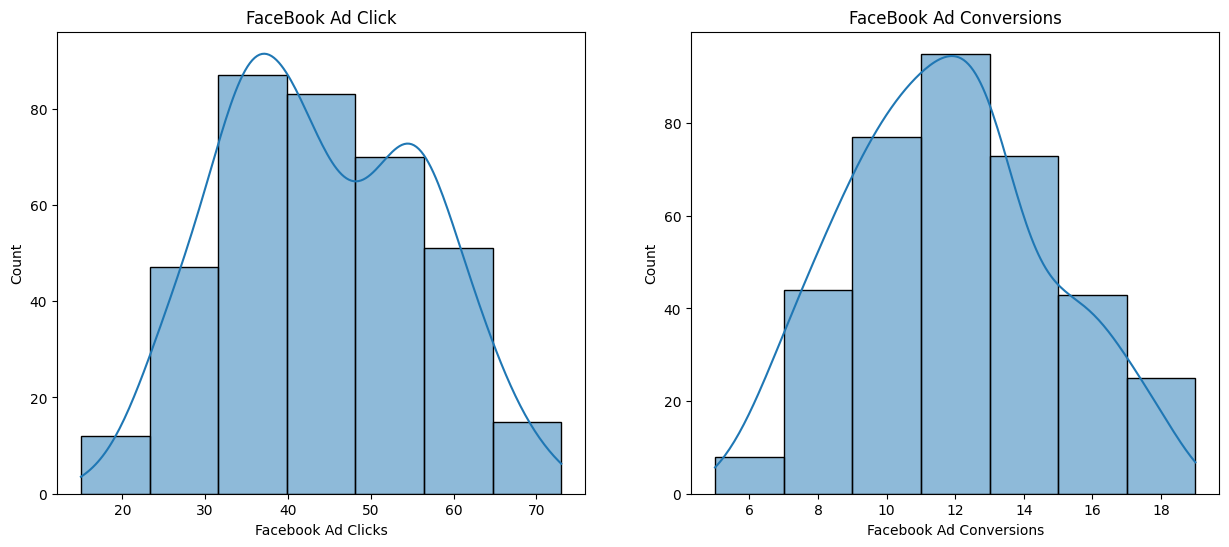

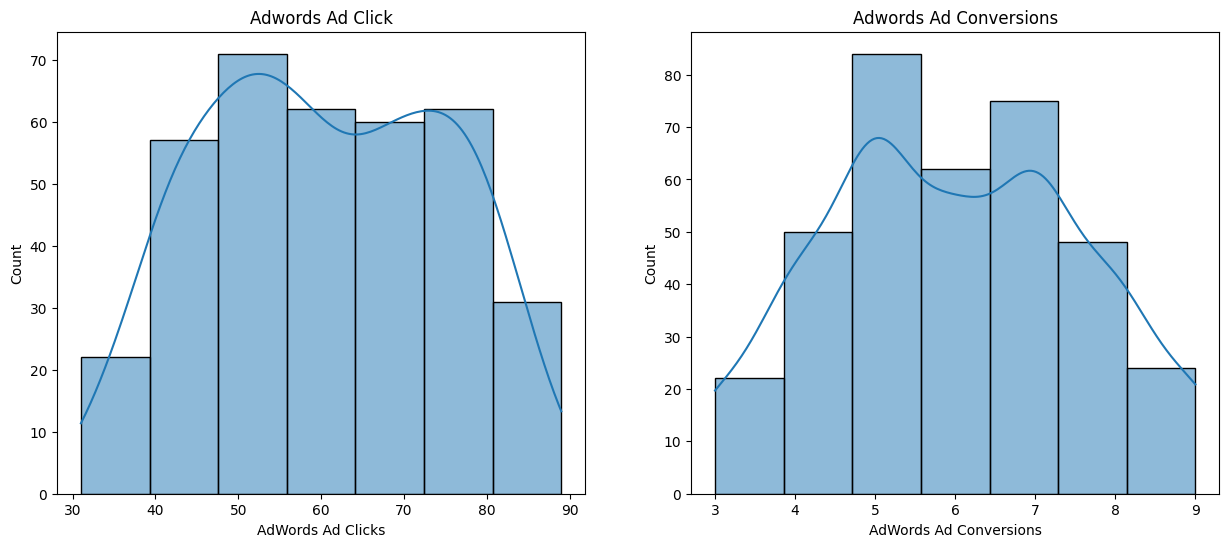

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('FaceBook Ad Click')
sns.histplot(df['Facebook Ad Clicks'],bins=7,kde=True)
plt.subplot(1,2,2)
plt.title("FaceBook Ad Conversions")
sns.histplot(df['Facebook Ad Conversions'],bins=7,kde=True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Adwords Ad Click')
sns.histplot(df['AdWords Ad Clicks'],bins=7,kde=True)
plt.subplot(1,2,2)
plt.title("Adwords Ad Conversions")
sns.histplot(df['AdWords Ad Conversions'],bins=7,kde=True)
plt.show()

how frequently do we observe day with hig low conversions

In [ ]:
def conversion_cat(col):
    category=[]
    for conv in df[col]:
        if conv < 5:
          category.append("less than 5")
        elif 5<=conv<=10:
             category.append("5 to 10 ")
        elif 11<=conv<16:
             category.append("11 to 15")
        else:
             category.append("more than 15")
    return category

df['Facebook conversion category']=conversion_cat('Facebook Ad Conversions')
df['Adwords conversion category']=conversion_cat('AdWords Ad Conversions')


In [ ]:
df[['Facebook Ad Conversions','Facebook conversion category','AdWords Ad Conversions','Adwords conversion category']].head()

,Facebook Ad Conversions,Facebook conversion category,AdWords Ad Conversions,Adwords conversion category
0,8,5 to 10,5,5 to 10
1,12,11 to 15,6,5 to 10
2,8,5 to 10,4,less than 5
3,9,5 to 10,5,5 to 10
4,7,5 to 10,7,5 to 10


In [ ]:
df['Facebook conversion category'].value_counts()

,count
Facebook conversion category,
11 to 15,189
5 to 10,129
more than 15,47


In [ ]:
facebook=pd.DataFrame(df['Facebook conversion category'].value_counts()).reset_index().rename(columns={'Facebook conversion category':'category'})

In [ ]:
facebook

,category,count
0,11 to 15,189
1,5 to 10,129
2,more than 15,47


In [ ]:
df['Adwords conversion category'].value_counts()

,count
Adwords conversion category,
5 to 10,293
less than 5,72


In [ ]:
adwords=pd.DataFrame(df['Adwords conversion category'].value_counts()).reset_index().rename(columns={'Adwords conversion category':'category'})
adwords

,category,count
0,5 to 10,293
1,less than 5,72


In [ ]:
cat_df=pd.merge(facebook,adwords,on='category',how='outer').fillna(0)
cat_df

,category,count_x,count_y
0,11 to 15,189.0,0.0
1,5 to 10,129.0,293.0
2,less than 5,0.0,72.0
3,more than 15,47.0,0.0


In [ ]:
cat_df=cat_df.iloc[[2,1,0,3]]
cat_df

,category,count_x,count_y
2,less than 5,0.0,72.0
1,5 to 10,129.0,293.0
0,11 to 15,189.0,0.0
3,more than 15,47.0,0.0


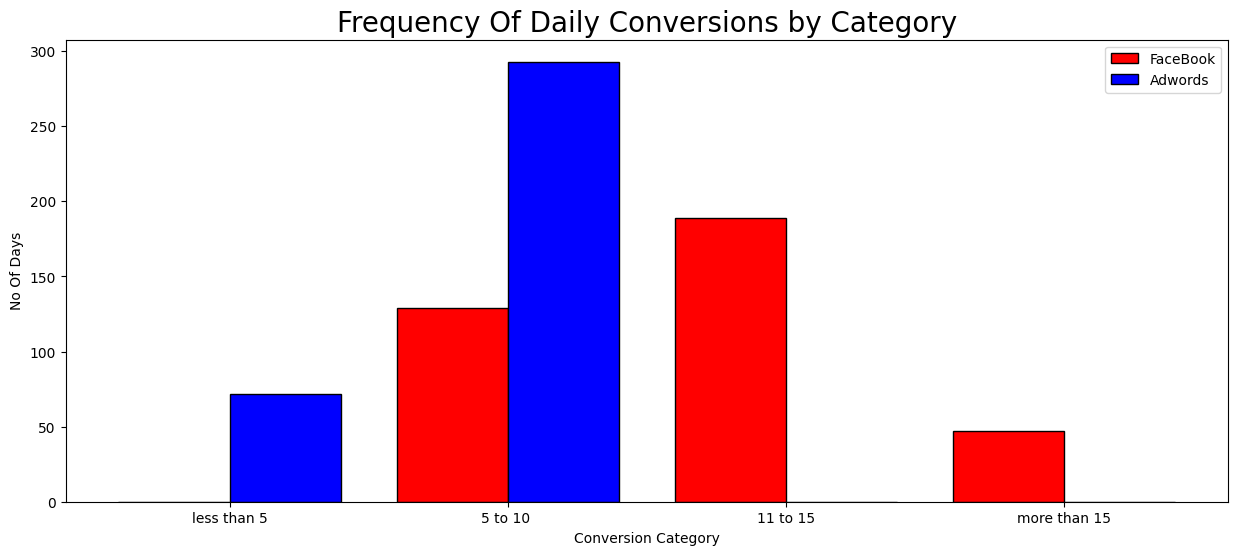

In [ ]:
x_axis=np.arange(len(cat_df))
plt.figure(figsize=(15,6))
plt.bar(x_axis-0.2,cat_df['count_x'],0.4,label='FaceBook',color='red',edgecolor='k')
plt.bar(x_axis+0.2,cat_df['count_y'],0.4,label='Adwords',color='blue',edgecolor='k')

plt.xticks(x_axis,cat_df['category'])
plt.xlabel("Conversion Category")
plt.ylabel("No Of Days")
plt.title("Frequency Of Daily Conversions by Category",fontsize=20)
plt.legend()
plt.show()


data shows facebook had more frequent conversions than adwords .adwords lacks in more than 11 conversion a day but is higher in typicaly 5 to 10 conversion daily

In [ ]:
face_corr=df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
face_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [ ]:
adwords_corr=df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


correlation specify the realtion here between actual conversion is related to click
facebook has correlation of 0.87 indicates a strong positive relationship between clicks on ads and sales.

for adwords the correlation is 0.45 it is also positive but not as  strong as facebook its indicate that clicks does contribute to sales but many other factors also affects sales

HYPOTHESIS TESTING

hypothesis: Advertising on facebook will result in greater no of conversions compared to adwords

null hypothesis(H0):no of conversions of adwords is greater or equal to that of facebook

alternate hypothesis(H1):The no of Conversions Of Facebook is greater than that of Adwords

In [ ]:
print("Facebook mean:",round(df['Facebook Ad Conversions'].mean(),2))
print("Adwords mean:",round(df['AdWords Ad Conversions'].mean(),2))

t_stats,p_value=st.ttest_ind(a=df['Facebook Ad Conversions'],b=df['AdWords Ad Conversions'],equal_var=False)
print('\nTstatstic',t_stats,'\np_value',p_value)

if p_value<0.05:
   print("Reject Null Hypothesis")
else:
    print("Fail To Reject Null Hypothesis")

Facebook mean: 11.74
Adwords mean: 5.98

Tstatstic 32.88402060758184 
p_value 9.348918164530465e-134
Reject Null Hypothesis


Here above by t test we understood Facebook has more Ad conversions compare to Adwords

Regression Analysis

How many Clicks Will Result in how many Conversions

In [ ]:
x=df[['Facebook Ad Clicks']]
y=df[['Facebook Ad Conversions']]
model=LinearRegression()
model.fit(x,y)
pred=model.predict(x)
r2score=r2_score(y,pred)*100
mse=mean_squared_error(y,pred)
print("accuracy",r2score)
print("mean square error",mse)

accuracy 76.34827765960227
mean square error 2.017713387008563


In [ ]:
# Predict conversions for 40 clicks
predicted_value = model.predict([[80]])[0][0]
print(f'For 80 Clicks, Expected Conversions: {round(predicted_value, 2)}')



For 80 Clicks, Expected Conversions: 19.31


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Analyzing Facebook metrics over time

In [ ]:
def parse_percentage(x):
    if isinstance(x, str) and x.endswith('%'):
        return float(x[:-1])
    return x

df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(parse_percentage)
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(parse_percentage)

In [ ]:
def clean_dollar(x):
    if isinstance(x, str):
        return float(x.replace('$', ''))
    return x  # keep NaN or already float

df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(clean_dollar)

df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(clean_dollar)

In [ ]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook conversion category,Adwords conversion category
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan19,4984,59,5,$194,1.18,8.40%,$3.30,5 to 10,5 to 10
1,2019-01-02,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan19,4022,71,6,$75,1.77,7.80%,$1.05,11 to 15,5 to 10
2,2019-01-03,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan19,3863,44,4,$141,1.13,9.59%,$3.23,5 to 10,less than 5
3,2019-01-04,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62,AW_Jan19,3911,49,5,$141,1.26,11.08%,$2.86,5 to 10,5 to 10
4,2019-01-05,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38,AW_Jan19,4070,55,7,$133,1.36,12.22%,$2.40,5 to 10,5 to 10


In [ ]:
data=df[['Date','Facebook Ad Views','Facebook Ad Clicks','Facebook Ad Conversions','Cost per Facebook Ad','Facebook Click-Through Rate (Clicks / View)','Facebook Conversion Rate (Conversions / Clicks)','Facebook Cost per Click (Ad Cost / Clicks)']]

In [ ]:
data.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


In [ ]:
data['month']=data['Date'].dt.month
data['week']=data['Date'].dt.weekday

<ipython-input-64-6e9869421a76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']=data['Date'].dt.month
<ipython-input-64-6e9869421a76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week']=data['Date'].dt.weekday


<BarContainer object of 7 artists>

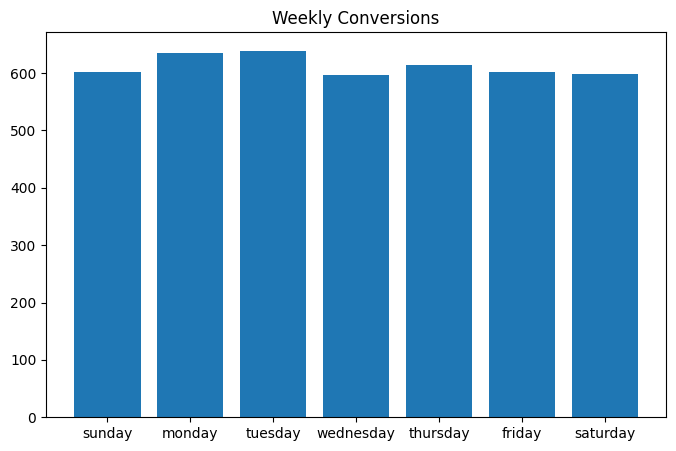

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
week_conv=data.groupby('week')[['Facebook Ad Conversions']].sum()
week_name=['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
plt.bar(week_name,week_conv['Facebook Ad Conversions'])

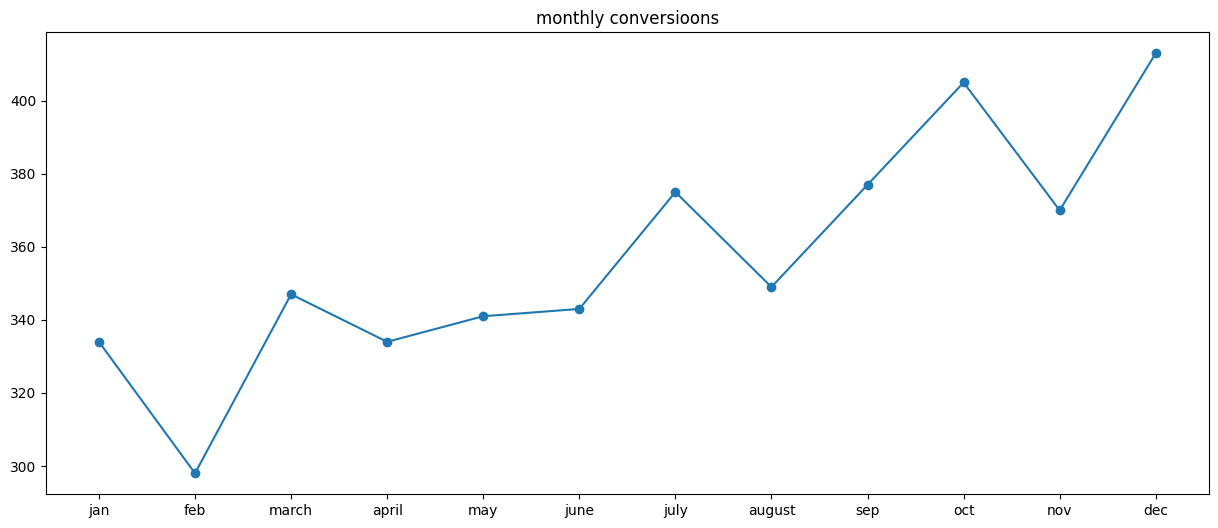

In [ ]:
plt.figure(figsize=(15,6))
plt.title('monthly conversioons')
mon_conv=data.groupby('month')[['Facebook Ad Conversions']].sum()
mon_name=['jan','feb','march','april','may','june','july','august','sep','oct','nov','dec']
plt.plot(mon_name,mon_conv['Facebook Ad Conversions'],'-o')
plt.show()